# Visualizing Euro and International Currency Exchange Rates, 1999-2023

The goal of this project is to use data visualization techniques to analyze and display the euro (€)'s daily exchange rates from its conception in 1999 to May 26, 2023. I create detailed infographics to answer the following questions: 
   1. How did the **EUR–CAD exchange rate fluctuate under the latest four Canadian Prime Ministers** since 1999?
   2. How did the **2007–2009 Great Recession** impact the EUR–USD and EUR–CAD exchange rates differently?
   3. How did the **COVID-19 pandemic**'s effects on euro exchange rates between North American and East Asian currencies differ? 

I used the database found [here](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020), which includes data from the inception of the euro in 1999 to May 26, 2023.

## Data Cleaning


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')

exchange_rates.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6311 non-null   object 
 1   [Australian dollar ]      6311 non-null   object 
 2   [Bulgarian lev ]          5909 non-null   object 
 3   [Brazilian real ]         6043 non-null   object 
 4   [Canadian dollar ]        6311 non-null   object 
 5   [Swiss franc ]            6311 non-null   object 
 6   [Chinese yuan renminbi ]  6043 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6311 non-null   object 
 9   [Danish krone ]           6311 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6311 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6311 non-null   object 
 14  [Croatia

There appear to be 41 different columns, all of which (except `Period\Unit:`) represent the euro's daily exchange rate with a foreign currency. Each column's datatype varies between being objects and floats. There are also 5699 rows including the header, but many foreign currency columns have null/NaN values. I can confirm this by quickly sampling the first five rows of the dataset. I will avoid using these currencies in my graphs.

In [2]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-05-26,1.6439,1.9558,5.3878,1.4630,0.9707,7.5874,NaN,23.648,7.4489,...,4.9572,NaN,11.5280,1.4520,NaN,NaN,37.2630,21.5340,1.0751,21.0148
1,2023-05-25,1.6443,1.9558,5.3320,1.4599,0.9708,7.5891,NaN,23.645,7.4502,...,4.9495,NaN,11.5490,1.4515,NaN,NaN,37.1540,21.3944,1.0735,20.7466
2,2023-05-24,1.6402,1.9558,5.3397,1.4600,0.9732,7.6005,NaN,23.671,7.4477,...,4.9614,NaN,11.5103,1.4526,NaN,NaN,37.1710,21.4487,1.0785,20.7479
3,2023-05-23,1.6282,1.9558,5.3649,1.4571,0.9718,7.6039,NaN,23.681,7.4475,...,4.9720,NaN,11.4494,1.4527,NaN,NaN,37.4350,21.3993,1.0779,20.7920
4,2023-05-22,1.6294,1.9558,5.4056,1.4618,0.9700,7.6067,NaN,23.676,7.4478,...,4.9737,NaN,11.3765,1.4554,NaN,NaN,37.2820,21.4629,1.0822,20.9137


## Data Cleaning

I first rename the main columns I'll be working with—the `Period\Unit:` and various currency columns—to more workable names. After converting the newly-named `Time` column to a datetime datatype to make it easier to work with, I can clean the the`US_dollar` and `Canadian_dollar` columns by removing redundant rows and converting them to floats.


In [3]:
exchange_rates.rename(columns={'[Canadian dollar ]': 'Canadian_dollar', 
                               '[US dollar ]': 'US_dollar',
                               '[Mexican peso ]': 'Mexican_peso',
                               '[Chinese yuan renminbi ]': 'Chinese_rmb',
                               '[Hong Kong dollar ]': 'Hong_Kong_dollar',
                               '[Japanese yen ]': 'Japanese_yen',
                               '[Korean won ]': 'Korean_won',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

euro_to_cad = exchange_rates[['Time', 'Canadian_dollar']]
euro_to_usd = exchange_rates[['Time', 'US_dollar']]

# remove rows where the currency columns contains '-', then convert to float
euro_to_cad = euro_to_cad[euro_to_cad['Canadian_dollar'].str.contains('-') == False]
euro_to_usd = euro_to_usd[euro_to_usd['US_dollar'].str.contains('-') == False]

euro_to_cad['Canadian_dollar'] = euro_to_cad['Canadian_dollar'].astype(float)
euro_to_usd['US_dollar'] = euro_to_usd['US_dollar'].astype(float)


In [4]:
euro_to_cad['Canadian_dollar'].value_counts()

1.4023    8
1.4382    8
1.4643    8
1.4334    8
1.4931    8
         ..
1.5797    1
1.5888    1
1.5747    1
1.5806    1
1.4609    1
Name: Canadian_dollar, Length: 3067, dtype: int64

In [5]:
euro_to_usd['US_dollar'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.1268    7
1.3373    6
         ..
1.4030    1
1.4113    1
1.4106    1
1.4127    1
1.0751    1
Name: US_dollar, Length: 3733, dtype: int64

## Simple Data Visualization

With the relevant columns now cleaned, I can now accurately visualize graphs, starting with line plots of the EUR–CAD and EUR–USD exchange rates.

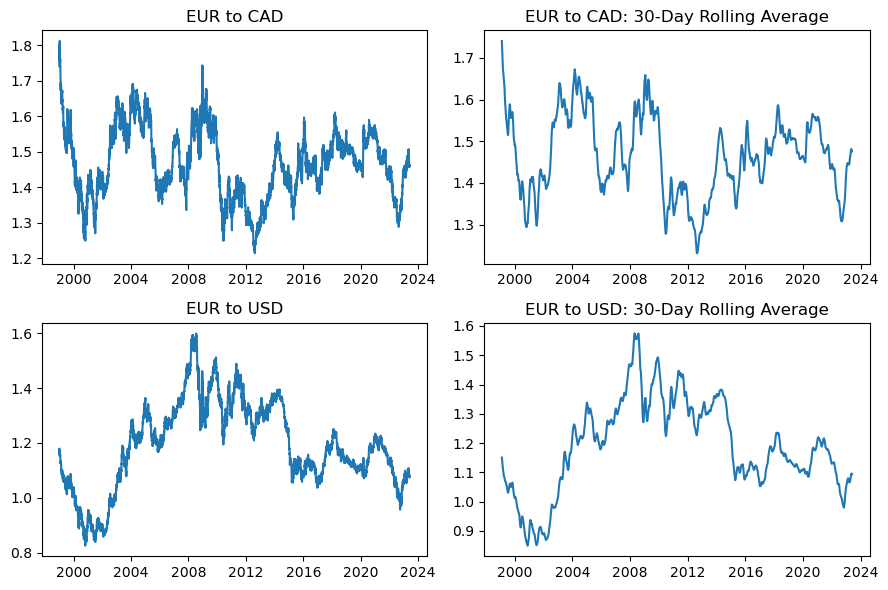

In [6]:
plt.style.use('default')

euro_to_cad['rolling_mean'] = euro_to_cad['Canadian_dollar'].rolling(30).mean()
euro_to_usd['rolling_mean'] = euro_to_usd['US_dollar'].rolling(30).mean()

plt.figure(figsize = (9, 6))

plt.subplot(2, 2, 1)
plt.plot(euro_to_cad['Time'], euro_to_cad['Canadian_dollar'])
plt.title('EUR to CAD')

plt.subplot(2, 2, 2)
plt.plot(euro_to_cad['Time'], euro_to_cad['rolling_mean'])
plt.title('EUR to CAD: 30-Day Rolling Average')

plt.subplot(2, 2, 3)
plt.plot(euro_to_usd['Time'], euro_to_usd['US_dollar'])
plt.title('EUR to USD')

plt.subplot(2, 2, 4)
plt.plot(euro_to_usd['Time'], euro_to_usd['rolling_mean'])
plt.title('EUR to USD: 30-Day Rolling Average')

plt.tight_layout()
plt.show()


## Storytelling Data Visualization

The simple graphs above provide a good overview to the line graphs that I can work with, but I want to generate more complex, storytelling-based graphs using appropriate visualization techniques and principles. In this section, I will create the following graphs and stories:

   1. How the **EUR–CAD exchange rate has fluctuated under the latest four Canadian Prime Ministers** (Jean Chrétien from 1993–2003 (note the Euro was launched in 1999), Paul Martin from 2003–2006, Stephen Harper from 2006–2015, and Justin Trudeau from 2015–present)
   2. How the **2007–2009 Great Recession** impacted the EUR–USD and EUR–CAD exchange rates differently
   3. How the **COVID-19 pandemic** affected the euro's exchange rates with currencies from North America and East Asia 
   
### EUR–CAD Exchange Rate Under Different Canadian Prime Ministers Since 1999

I begin exploring the first visualization by creating a dataframe tracking the EUR–CAD exchange rate for each of the four Prime Ministers since 1999.

In [7]:
Chrétien = euro_to_cad[(euro_to_cad['Time'].dt.year >= 1999) & (euro_to_cad['Time'].dt.year < 2003)]
Martin = euro_to_cad[(euro_to_cad['Time'].dt.year >= 2003) & (euro_to_cad['Time'].dt.year < 2006)]
Harper = euro_to_cad[(euro_to_cad['Time'].dt.year >= 2006) & (euro_to_cad['Time'].dt.year < 2015)]
Trudeau = euro_to_cad[(euro_to_cad['Time'].dt.year >= 2015) & (euro_to_cad['Time'].dt.year <= 2023)]

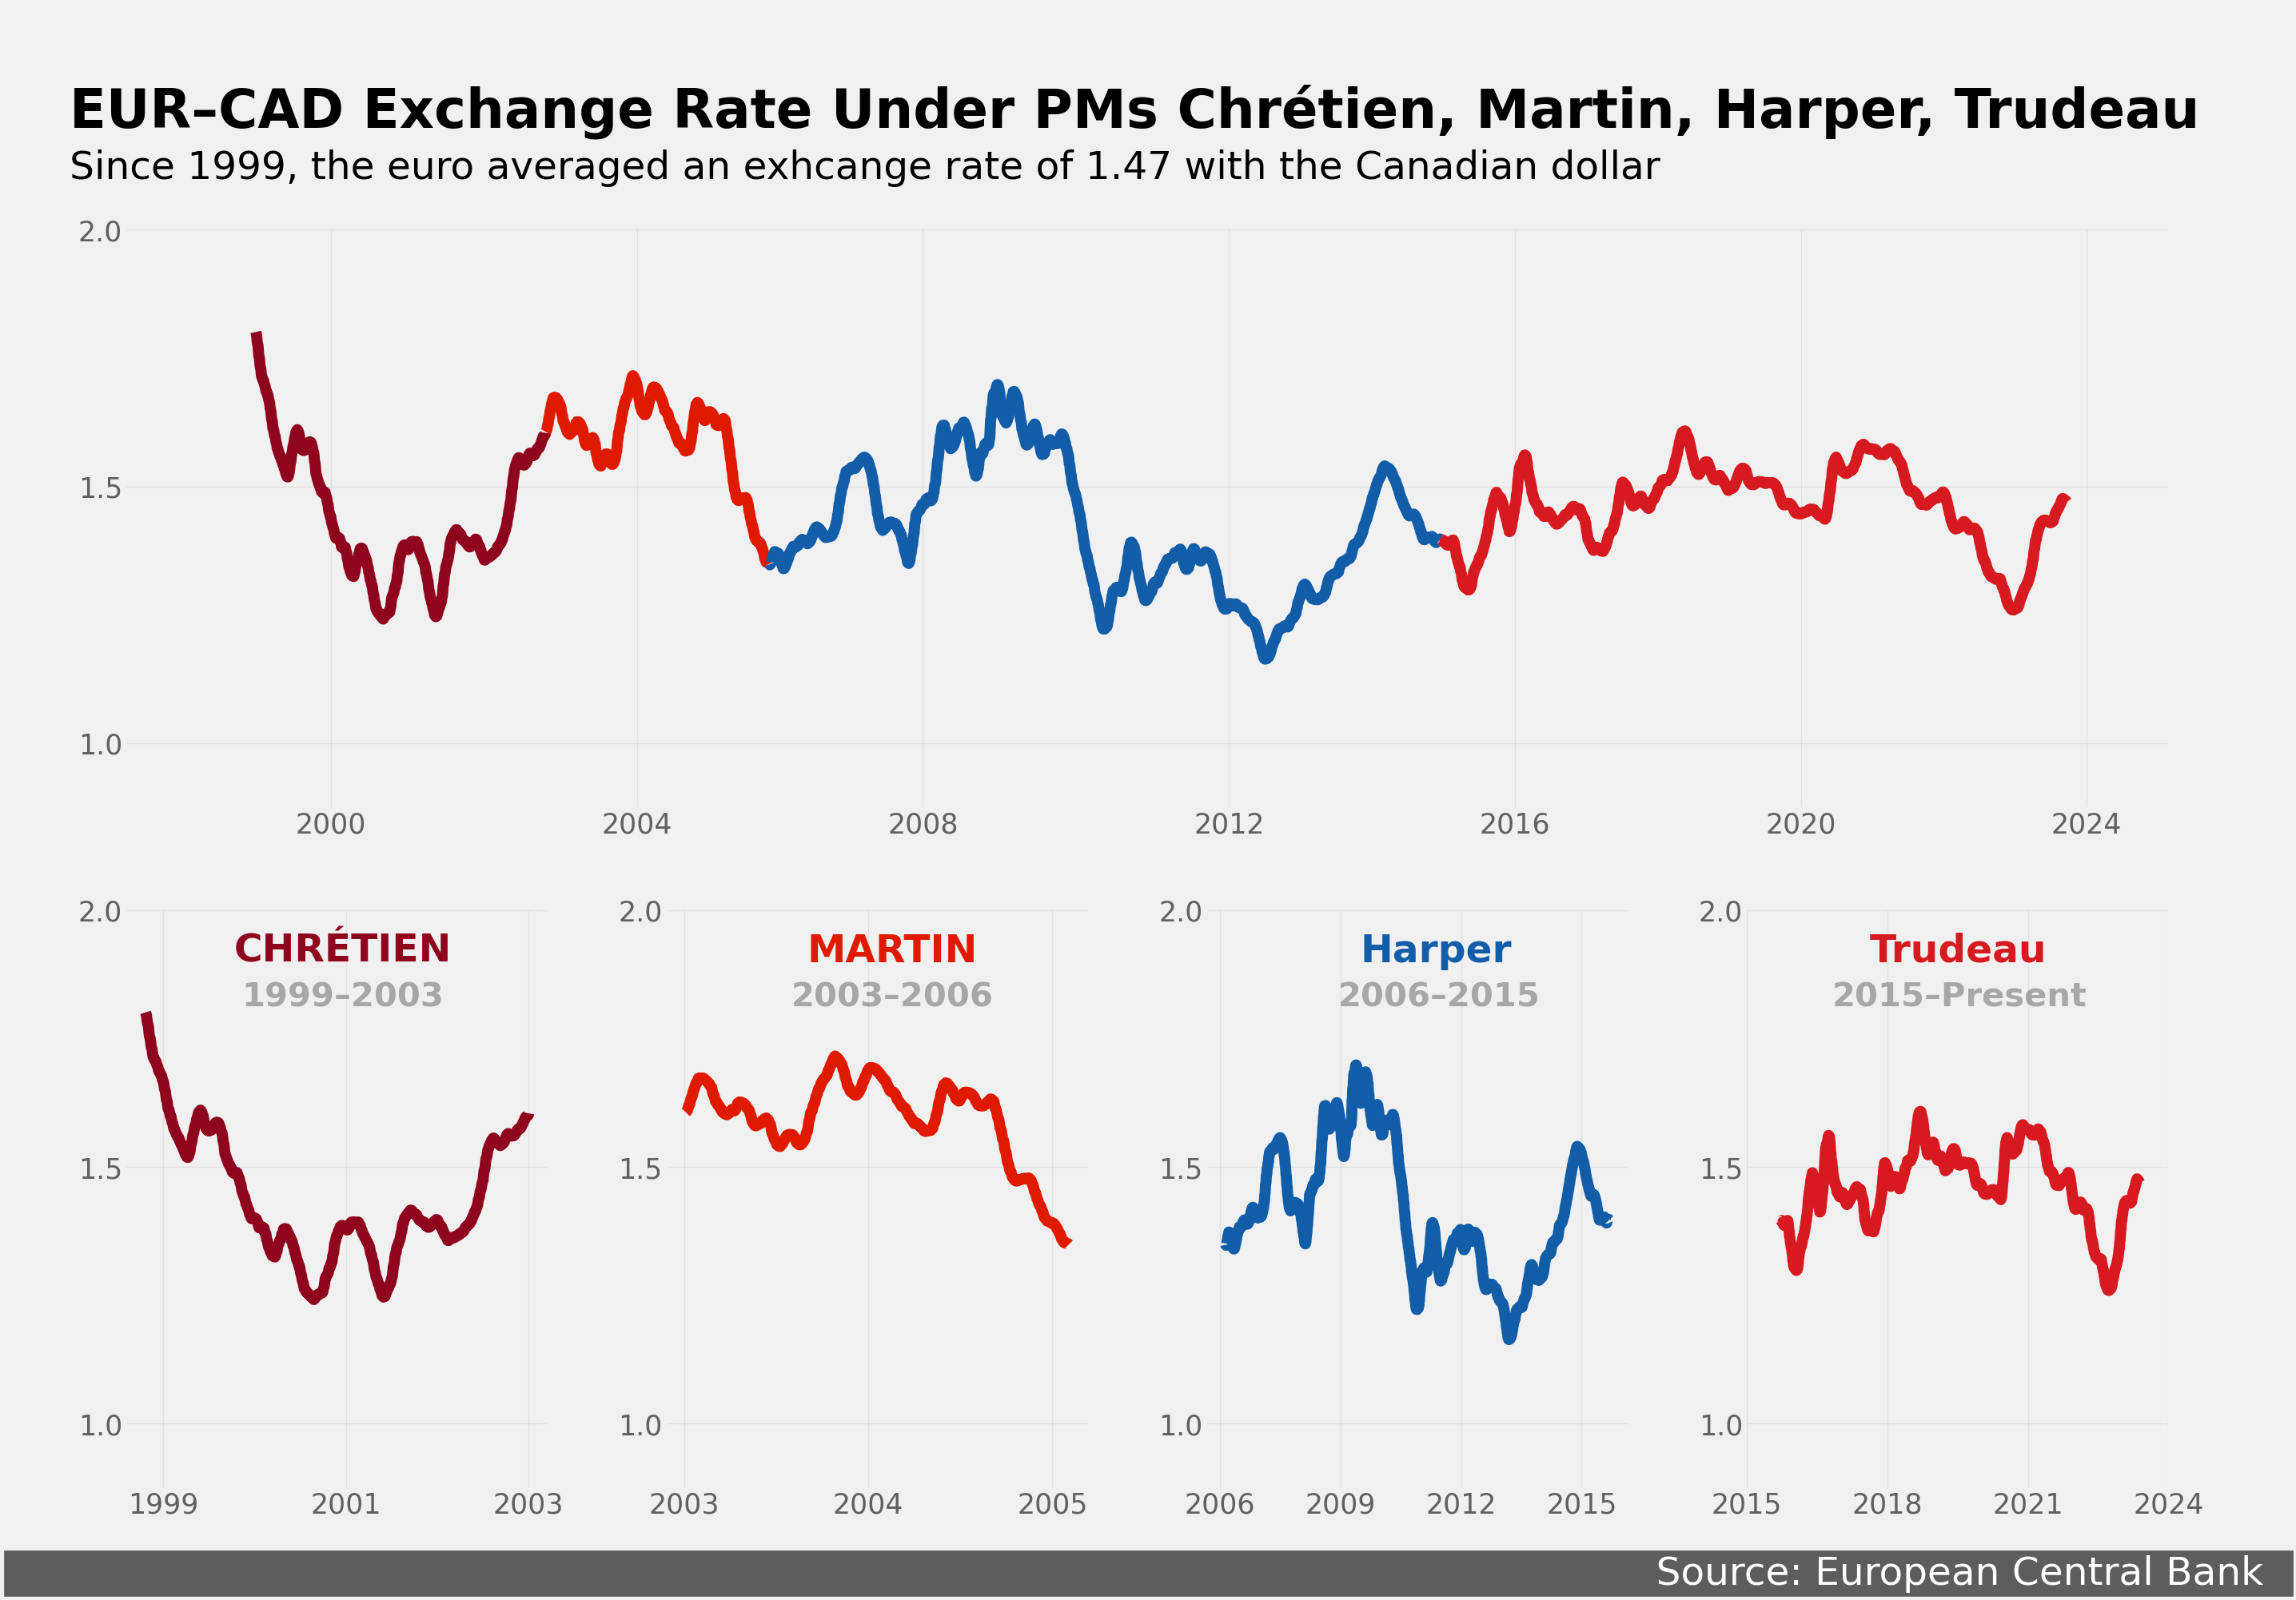

In [8]:
plt.style.use('fivethirtyeight')

# configure subplots
plt.figure(figsize = (28, 18))

ax1 = plt.subplot(2, 1, 1) # the long, connected line chart

ax2 = plt.subplot(2, 4, 5) # chart for exchange rate under Chrétien
ax3 = plt.subplot(2, 4, 6) # chart for exchange rate under Martin
ax4 = plt.subplot(2, 4, 7) # chart for exchange rate under Harper
ax5 = plt.subplot(2, 4, 8) # chart for exchange rate under Trudeau

plt.tight_layout(pad = 5)

# remove borders, lighten grids, and set ticks
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.grid(alpha = 0.4)
    ax.set_ylim([1.0, 1.9])
    ax.set_yticks([1.1, 1.5, 1.9])
    ax.set_yticklabels([1.0, 1.5, 2.0], size = 25, alpha = 0.6)
    ax.tick_params(bottom = 0, left = 0)
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
    
# ax1: Joined chart
ax1.plot(Chrétien['Time'], Chrétien['rolling_mean'], linewidth = 10, color = '#8e051d')
ax1.plot(Martin['Time'], Martin['rolling_mean'], linewidth = 10, color = '#e01a00')
ax1.plot(Harper['Time'], Harper['rolling_mean'], linewidth = 10, color = '#115DA8')
ax1.plot(Trudeau['Time'], Trudeau['rolling_mean'], linewidth = 10, color = '#d71920')
ax1.set_xlim([10000, 20000])
ax1.set_xticks([11000, 12500, 13900, 15400, 16800, 18200, 19600])
ax1.set_xticklabels([2000, 2004, 2008, 2012, 2016, 2020, 2024], size = 25, alpha = 0.6)

# ax2: Chrétien
ax2.plot(Chrétien['Time'], Chrétien['rolling_mean'], linewidth = 10, color = '#8e051d')
ax2.set_xticks([10700, 11375, 12050])
ax2.set_xticklabels([1999, 2001, 2003], size = 25, alpha = 0.6)
ax2.text(10960, 1.82, 'CHRÉTIEN', size = 35, weight = 'bold', color = '#8e051d')
ax2.text(10990, 1.75, '1999–2003', size = 30, weight = 'bold', alpha = 0.3)

# ax3: Martin
ax3.plot(Martin['Time'], Martin['rolling_mean'], linewidth = 10, color = '#e01a00')
ax3.set_xticks([12050, 12575, 13100])
ax3.set_xticklabels([2003, 2004, 2005], size = 25, alpha = 0.6)
ax3.text(12400, 1.82, 'MARTIN', size = 35, weight = 'bold', color = '#e01a00')
ax3.text(12355, 1.75, '2003–2006', size = 30, weight = 'bold', alpha = 0.3)

# ax4: Harper
ax4.plot(Harper['Time'], Harper['rolling_mean'], linewidth = 10, color = '#115DA8')
ax4.set_xticks([13100, 14133, 15166, 16200])
ax4.set_xticklabels([2006, 2009, 2012, 2015], size = 25, alpha = 0.6)
ax4.text(14300, 1.82, 'Harper', size = 35, weight = 'bold', color = '#115DA8')
ax4.text(14110, 1.75, '2006–2015', size = 30, weight = 'bold', alpha = 0.3)

# ax5: Trudeau
ax5.plot(Trudeau['Time'], Trudeau['rolling_mean'], linewidth = 10, color = '#d71920')
ax5.set_xticks([16150, 17350, 18550, 19750])
ax5.set_xticklabels([2015, 2018, 2021, 2024], size = 25, alpha = 0.6)
ax5.text(17200, 1.82, 'Trudeau', size = 35, weight = 'bold', color = '#d71920')
ax5.text(16880, 1.75, '2015–Present', size = 30, weight = 'bold', alpha = 0.3)

# title and subtitle
ax1.text(9720, 2.06, 'EUR–CAD Exchange Rate Under PMs Chrétien, Martin, Harper, Trudeau', size = 48.5, weight = 'bold')
ax1.text(9720, 1.98, 'Since 1999, the euro averaged an exhcange rate of 1.47 with the Canadian dollar', size = 35)

# signature and overall margins padding
ax1.text(9420, -0.21, ' '*133 + 'Source: European Central Bank  ', size = 35, color = 'white', backgroundcolor = '#5e5d5d')
ax1.text(9420, 2.2, ' '*183, size = 35)

plt.show()


The EUR–CAD exchange rate reached a low under Prime Minister Stephen Harper in 2012 and has stayed, except for a brief period during the COVID-19 pandemic, relatively consistent under Prime Minister Justin Trudeau. Additionally, the rate was quite volatile under the Jean Chrétien and Paul Martin administrations.

### The 2007–2009 Great Recession's Differing Impacts on EUR–CAD Vs. EUR–USD Exchange Rates

In [9]:
cad_overall = euro_to_cad[(euro_to_cad['Time'].dt.year >= 2006) & (euro_to_cad['Time'].dt.year <= 2010)]
usd_overall = euro_to_usd[(euro_to_usd['Time'].dt.year >= 2006) & (euro_to_usd['Time'].dt.year <= 2010)]
cad_crisis = euro_to_cad[(euro_to_cad['Time'].dt.year > 2007) & (euro_to_cad['Time'].dt.year <= 2009)]
usd_crisis = euro_to_usd[(euro_to_cad['Time'].dt.year >= 2007) & (euro_to_usd['Time'].dt.year <= 2008)]

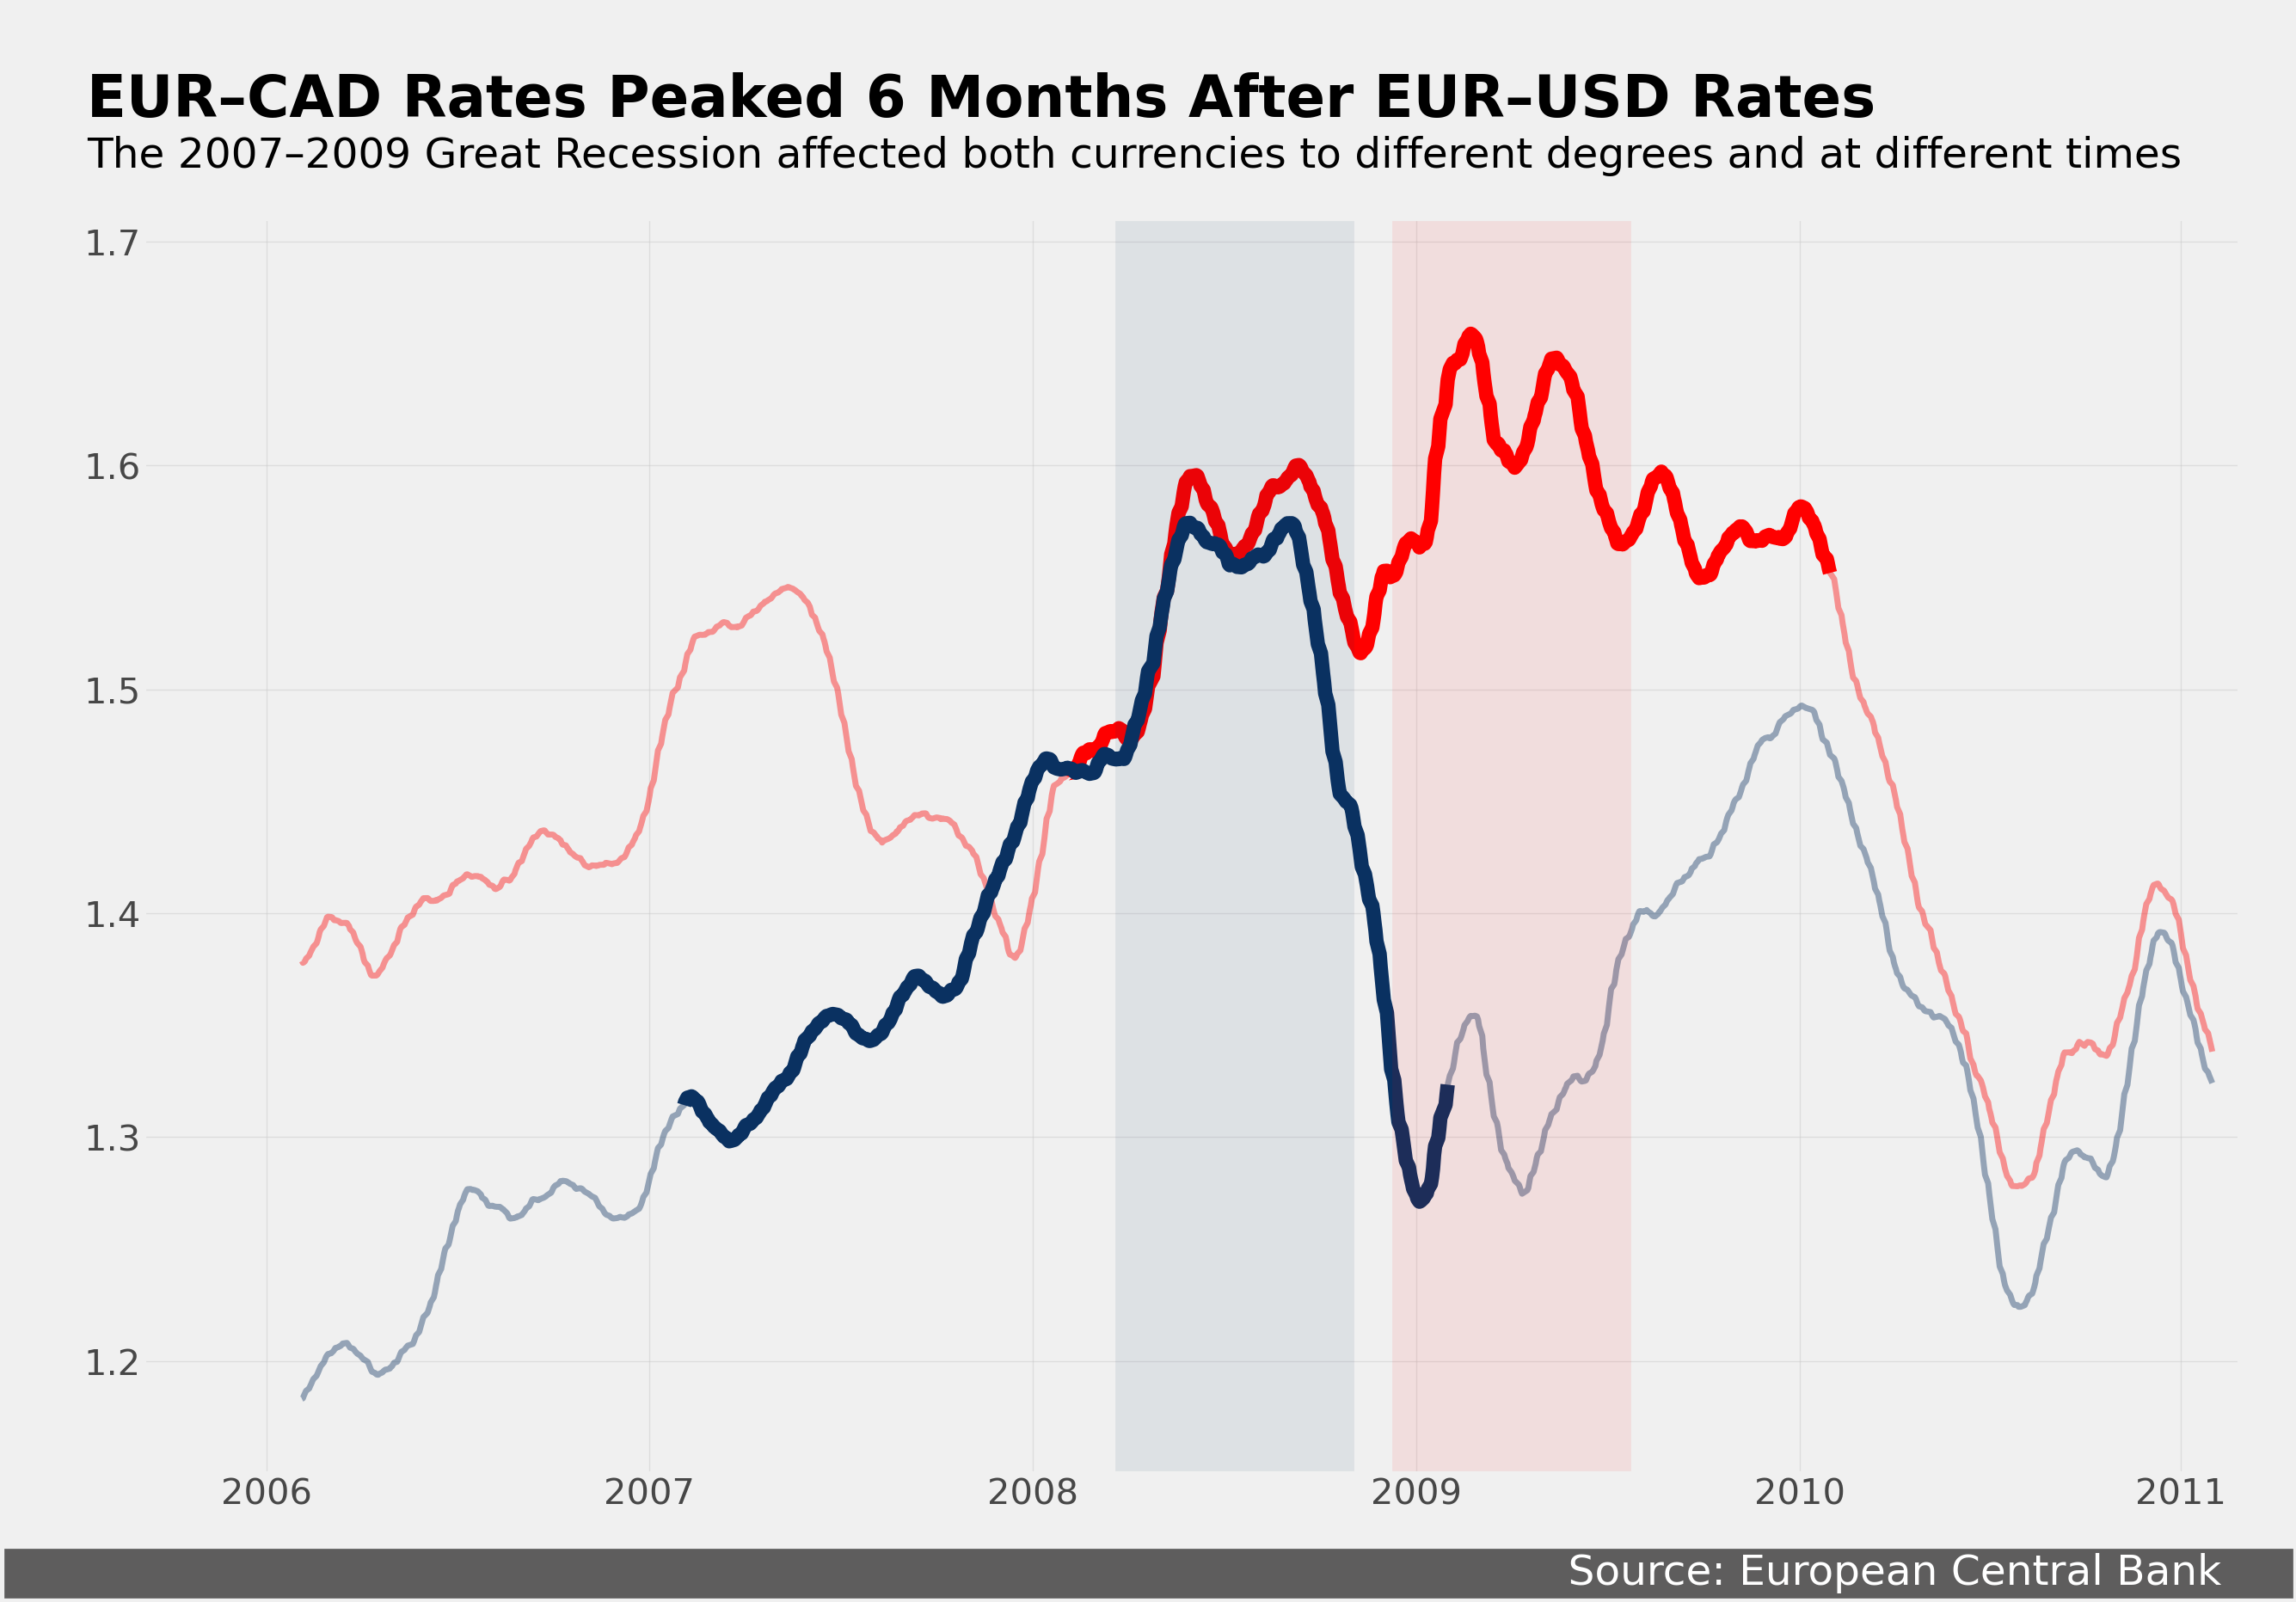

In [10]:
fig, ax = plt.subplots(figsize = (28, 18))

# overall period (years 2006 to 2010) graphs for comparison
ax.plot(cad_overall['Time'], cad_overall['rolling_mean'], linewidth = 5, color = '#FF0000', alpha = 0.4)
ax.plot(usd_overall['Time'], usd_overall['rolling_mean'], linewidth = 5, color = '#0A3161', alpha = 0.4)

# financial crisis period (years 2007 to 2009) graphs
ax.plot(cad_crisis['Time'], cad_crisis['rolling_mean'], linewidth = 12, color = '#FF0000')
ax.plot(usd_crisis['Time'], usd_crisis['rolling_mean'], linewidth = 12, color = '#0A3161')

# highligting peak exchange rates
ax.axvline(14305, linewidth = 200, color = '#FF0000', alpha = 0.08)
ax.axvline(14041, linewidth = 200, color = '#0A3161', alpha = 0.08)

# formatting ticks and labels
ax.grid(alpha = 0.5)
ax.set_ylim([1.15, 1.71])
ax.set_yticks([1.2, 1.3, 1.4, 1.5, 1.6, 1.7])
ax.set_yticklabels([1.2, 1.3, 1.4, 1.5, 1.6, 1.7], size = 30, alpha = 0.7)
ax.set_xlim([13000, 15000])
ax.set_xticks([13116, 13482, 13848, 14214, 14580, 14944])
ax.set_xticklabels([2006, 2007, 2008, 2009, 2010, 2011], size = 30, alpha = 0.7)

# title and subtitle
ax.text(12945, 1.756, 'EUR–CAD Rates Peaked 6 Months After EUR–USD Rates', size = 48.5, weight = 'bold')
ax.text(12945, 1.733, 'The 2007–2009 Great Recession affected both currencies to different degrees and at different times', size = 35)
    
# signature and overall margins padding
ax.text(12870, 1.1, ' '*117 + 'Source: European Central Bank  ' + ' '*3, size = 35, color = 'white', backgroundcolor = '#5e5d5d')
ax.text(12870, 1.79, ' '*171, size = 35)
    
plt.show()


The EUR–CAD exchange rate peaked roughly half a year after the EUR–USD exchange rate peaked. Except for a brief period around the end of 2007, the EUR consistently had a higher exchange rate with the CAD than it did with the USD.

### The COVID-19 Pandemic's Impact on Select Regions' Currencies

In [11]:
# preparing new selected currencies for visualization (removing "-" rows and converting to float)
euro_to_mxn = exchange_rates[['Time', 'Mexican_peso']]
euro_to_cny = exchange_rates[['Time', 'Chinese_rmb']]
euro_to_hkd = exchange_rates[['Time', 'Hong_Kong_dollar']]
euro_to_jpy = exchange_rates[['Time', 'Japanese_yen']]
euro_to_krw = exchange_rates[['Time', 'Korean_won']]

euro_to_mxn = euro_to_mxn[euro_to_mxn['Mexican_peso'].str.contains('-') == False]
euro_to_cny = euro_to_cny[euro_to_cny['Chinese_rmb'].str.contains('-') == False]
euro_to_hkd = euro_to_hkd[euro_to_hkd['Hong_Kong_dollar'].str.contains('-') == False]
euro_to_jpy = euro_to_jpy[euro_to_jpy['Japanese_yen'].str.contains('-') == False]
euro_to_krw = euro_to_krw[euro_to_krw['Korean_won'].str.contains('-') == False]

euro_to_mxn['Mexican_peso'] = euro_to_mxn['Mexican_peso'].astype(float)
euro_to_cny['Chinese_rmb'] = euro_to_cny['Chinese_rmb'].astype(float)
euro_to_hkd['Hong_Kong_dollar'] = euro_to_hkd['Hong_Kong_dollar'].astype(float)
euro_to_jpy['Japanese_yen'] = euro_to_jpy['Japanese_yen'].astype(float)
euro_to_krw['Korean_won'] = euro_to_krw['Korean_won'].astype(float)

# North America: Canada (CAD), USA (USD), Mexico (MXN)
cad_pandemic = euro_to_cad[(euro_to_cad['Time'].dt.year >= 2019) & (euro_to_cad['Time'].dt.year <= 2023)]
usd_pandemic = euro_to_usd[(euro_to_usd['Time'].dt.year >= 2019) & (euro_to_usd['Time'].dt.year <= 2023)]

euro_to_mxn['rolling_mean'] = euro_to_mxn['Mexican_peso'].rolling(30).mean()
mxn_pandemic = euro_to_mxn[(euro_to_mxn['Time'].dt.year >= 2019) & (euro_to_mxn['Time'].dt.year <= 2023)]

# East Asia: China (CNY), Hong Kong (HKD), Japan (JPY), South Korea (KRW)
euro_to_cny['rolling_mean'] = euro_to_cny['Chinese_rmb'].rolling(30).mean()
euro_to_hkd['rolling_mean'] = euro_to_hkd['Hong_Kong_dollar'].rolling(30).mean()
euro_to_jpy['rolling_mean'] = euro_to_jpy['Japanese_yen'].rolling(30).mean()
euro_to_krw['rolling_mean'] = euro_to_krw['Korean_won'].rolling(30).mean()
cny_pandemic = euro_to_cny[(euro_to_cny['Time'].dt.year >= 2019) & (euro_to_cny['Time'].dt.year <= 2023)]
hkd_pandemic = euro_to_hkd[(euro_to_hkd['Time'].dt.year >= 2019) & (euro_to_hkd['Time'].dt.year <= 2023)]
jpy_pandemic = euro_to_jpy[(euro_to_jpy['Time'].dt.year >= 2019) & (euro_to_jpy['Time'].dt.year <= 2023)]
krw_pandemic = euro_to_krw[(euro_to_krw['Time'].dt.year >= 2019) & (euro_to_krw['Time'].dt.year <= 2023)]

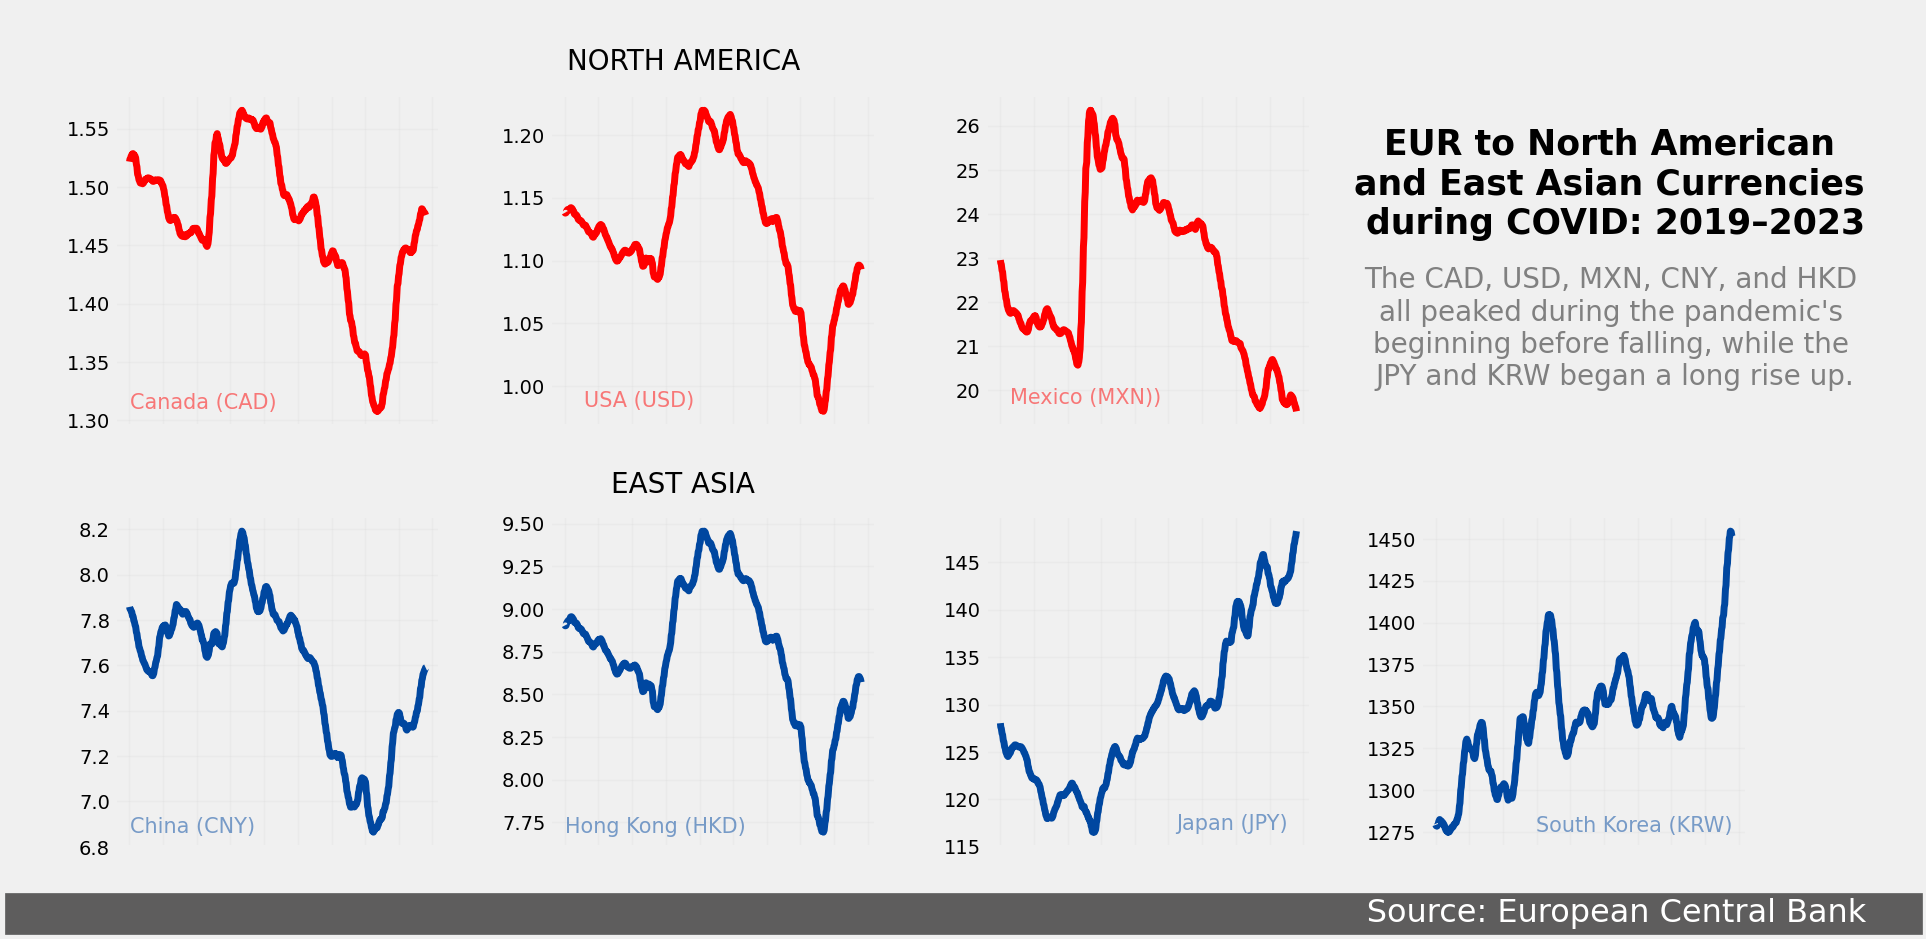

In [12]:
# configure two-row, four-column subplot grid
plt.figure(figsize = (18, 9))

ax1 = plt.subplot(2, 4, 1) # CAD
ax2 = plt.subplot(2, 4, 2) # USD
ax3 = plt.subplot(2, 4, 3) # MXN
ax5 = plt.subplot(2, 4, 5) # CNY
ax6 = plt.subplot(2, 4, 6) # HKD
ax7 = plt.subplot(2, 4, 7) # JPY
ax8 = plt.subplot(2, 4, 8) # KRW
plt.tight_layout(pad = 3)

# remove all x-axis tick labels
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    ax.grid(alpha = 0.15)
    ax.set_xticklabels([])

# North American currencies
ax1.plot(cad_pandemic['Time'], cad_pandemic['rolling_mean'], linewidth = 5, color = '#FF0000')
ax2.plot(usd_pandemic['Time'], usd_pandemic['rolling_mean'], linewidth = 5, color = '#FF0000')
ax3.plot(mxn_pandemic['Time'], mxn_pandemic['rolling_mean'], linewidth = 5, color = '#FF0000')
ax1.text(20270, 1.6, 'NORTH AMERICA', size = 20)
ax1.text(17900, 1.31, 'Canada (CAD)', size = 15, color = '#FF0000', alpha = 0.5)
ax2.text(18000, 0.984, 'USA (USD)', size = 15, color = '#FF0000', alpha = 0.5)
ax3.text(17950, 19.7, 'Mexico (MXN))', size = 15, color = '#FF0000', alpha = 0.5)

# East Asian currencies
ax5.plot(cny_pandemic['Time'], cny_pandemic['rolling_mean'], linewidth = 5, color = '#0047A0')
ax6.plot(hkd_pandemic['Time'], hkd_pandemic['rolling_mean'], linewidth = 5, color = '#0047A0')
ax7.plot(jpy_pandemic['Time'], jpy_pandemic['rolling_mean'], linewidth = 5, color = '#0047A0')
ax8.plot(krw_pandemic['Time'], krw_pandemic['rolling_mean'], linewidth = 5, color = '#0047A0')
ax5.text(20510, 8.36, 'EAST ASIA', size = 20)
ax5.text(17900, 6.86, 'China (CNY)', size = 15, color = '#0047A0', alpha = 0.5)
ax6.text(17900, 7.69, 'Hong Kong (HKD)', size = 15, color = '#0047A0', alpha = 0.5)
ax7.text(18850, 116.75, 'Japan (JPY)', size = 15, color = '#0047A0', alpha = 0.5)
ax8.text(18440, 1275, 'South Korea (KRW)', size = 15, color = '#0047A0', alpha = 0.5)

# title and subtitle
ax1.text(25950, 1.46, 'EUR to North American \nand East Asian Currencies \nduring COVID: 2019–2023', size = 25, weight = 'bold', horizontalalignment = 'center')
ax1.text(25950, 1.33, "The CAD, USD, MXN, CNY, and HKD \nall peaked during the pandemic's \nbeginning before falling, while the \nJPY and KRW began a long rise up.", size = 20, color = 'grey', horizontalalignment = 'center')

# signature and overall padding
ax1.text(17250, 0.87, ' '*134 + 'Source: European Central Bank  ' + ' '*3, size = 23, color = 'white', backgroundcolor = '#5e5d5d')
ax1.text(17250, 1.62, ' '*123, size = 35)

plt.show()


Interestingly, the EUR's exchange rate with the CNY and HKD paralled the EUR's exchange rate with the North American currencies, with similar spikes and troughs during the COVID-19 pandemic. This is in stark contrast to other East Asian currencies; the EUR's exchange rate with the Japanese Yen and Korean Won both increased dramatically after the intial pandemic wave.

## Conclusion

I was able to answer my three intial questions. I found that the EUR–CAD rate was most volatile under Chrétien and relatively stable under Trudeau, that the Great Recession peaked the EUR–CAD rate half a year after it did for the USD, and that the CNY and HKD had more similarities to North American currencies during the COVID-19 pandemic than their East Asian neighbours, who saw their EUR–domestic currency exchange rates go on an upwards trend.